In [2]:
from google.colab import drive
drive.mount('/content/drive')
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Mounted at /content/drive
cpu


In [3]:
BATCH_SIZE = 1
# save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/CNN_MNIST.pt"
# save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/CNN_CIFAR10.pt"
save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/CNN_deep_CIFAR10.pt"
# save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/CNN_deep_STL10.pt"
transform = transforms.ToTensor()

# test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)
test_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transforms.ToTensor())
# test_DS = datasets.STL10(root = '/content/drive/MyDrive/Colab Notebooks/data', split='test', download=True, transform=transforms.ToTensor())
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(3,8,3, padding=1),
                                   nn.BatchNorm2d(8),
                                   nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Sequential(nn.Conv2d(8,16,3, padding=1),
                                   nn.BatchNorm2d(16),
                                   nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Sequential(nn.Conv2d(16,32,3, padding=1),
                                   nn.BatchNorm2d(32),
                                   nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32*4*4,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x

class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU(),
                                         nn.Conv2d(32,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)
        
        self.classifier = nn.Sequential(nn.Linear(128*4*4,512),
                                        nn.Linear(512,10))
        
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [5]:
load_model=torch.load(save_model_path, map_location=DEVICE)
print(load_model)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

In [6]:
# for MNIST # 내 필기용
# load_model.eval()
# with torch.no_grad():
#     X_TEST_b, Y_TEST_b = next(iter(test_DL))
#     X_TEST_b = X_TEST_b.to(DEVICE)
#     Y_TEST_b = Y_TEST_b.to(DEVICE)
#     y_pred = load_model(X_TEST_b) 
#     pred = y_pred.argmax(dim=1)

#     feat_map1=load_model.act1(load_model.bn1(load_model.conv1(X_TEST_b)))
#     feat_map2=load_model.act2(load_model.bn2(load_model.conv2(load_model.Maxpool1(feat_map1))))


# plt.figure()
# plt.imshow(X_TEST_b[0,0,...], cmap="gray")

# print(feat_map1.shape)
# plt.figure(figsize=(8,4))
# for idx in range(8):
#     plt.subplot(2,4, idx+1, xticks=[], yticks=[])
#     plt.imshow(feat_map1[0,idx,...], cmap="gray")

# print(feat_map2.shape)
# plt.figure(figsize=(16,4))
# for idx in range(16):
#     plt.subplot(2,8, idx+1, xticks=[], yticks=[])
#     plt.imshow(feat_map2[0,idx,...], cmap="gray")

torch.Size([1, 32, 32, 32])
torch.Size([1, 64, 16, 16])
torch.Size([1, 128, 8, 8])


Text(0.5, 1.0, 'airplane (airplane)')

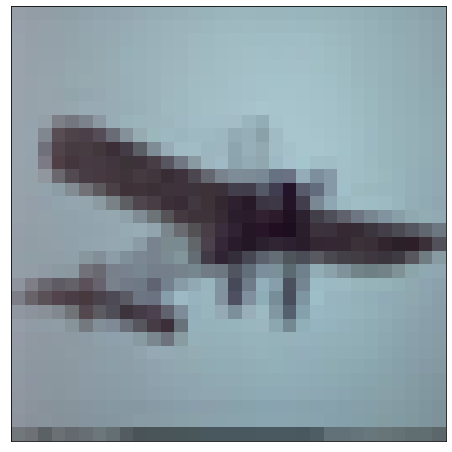

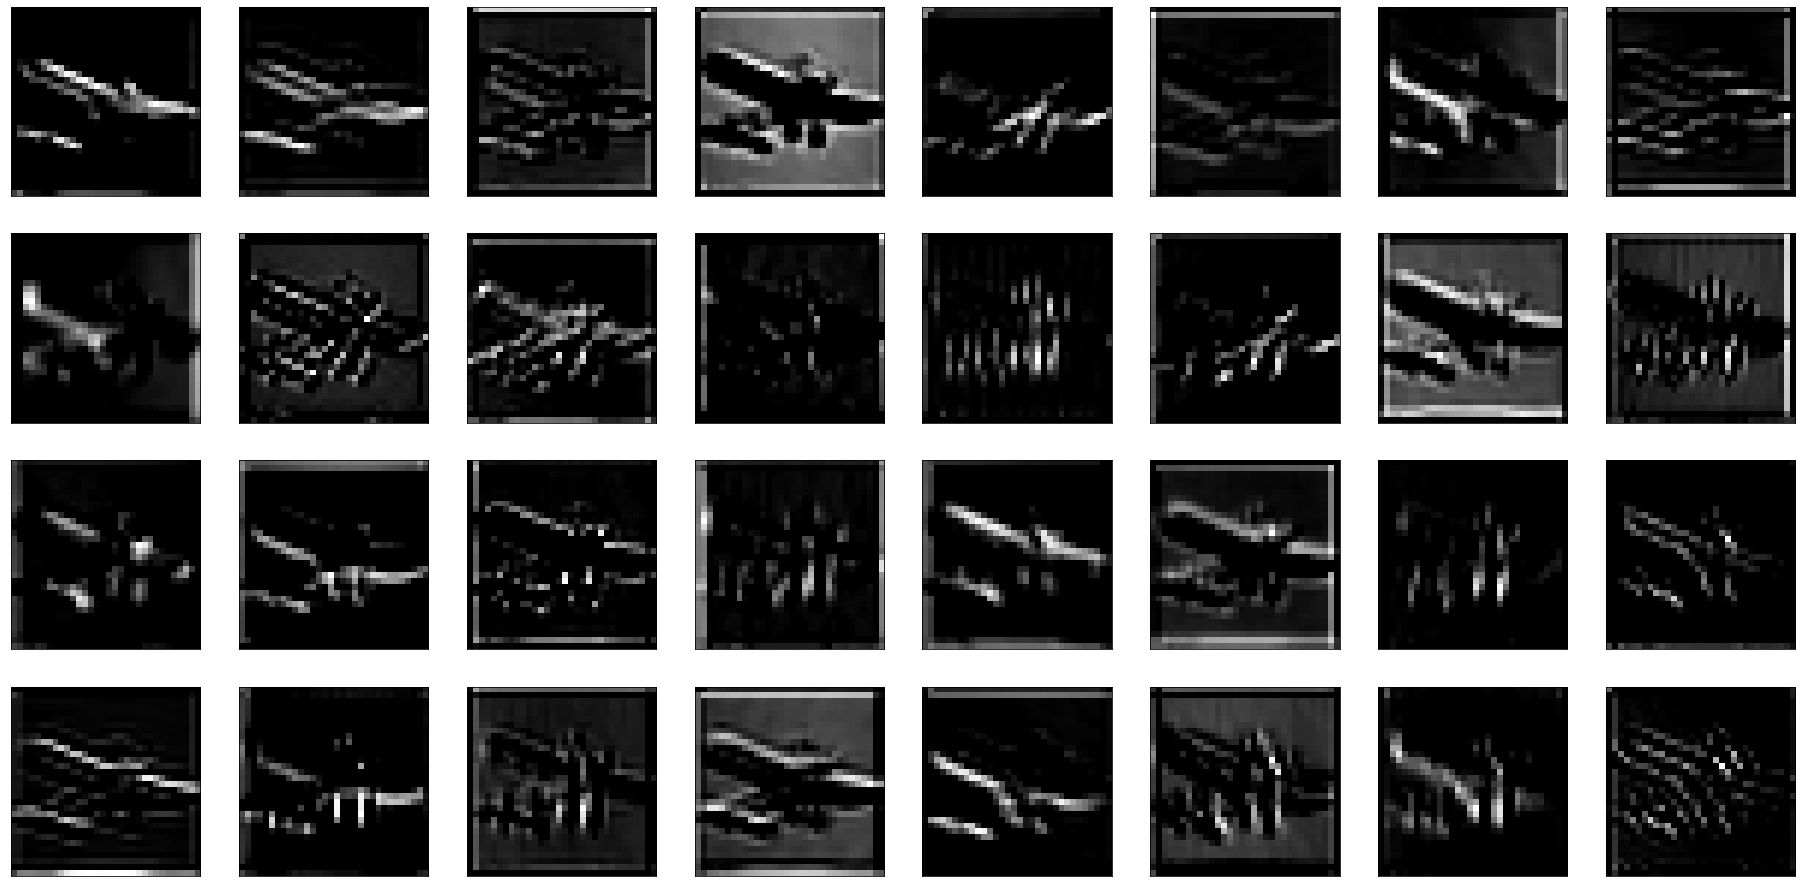

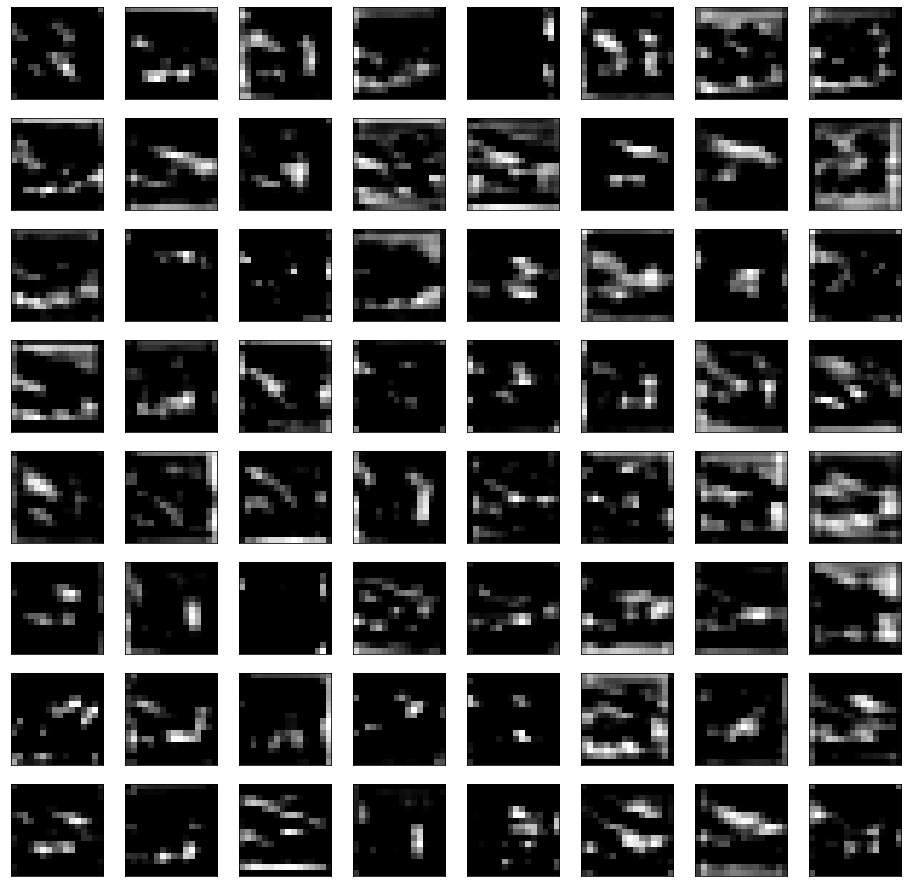

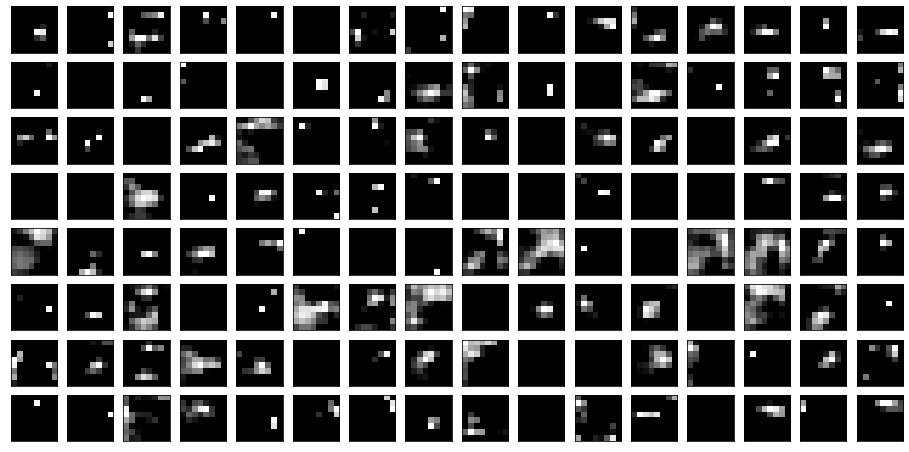

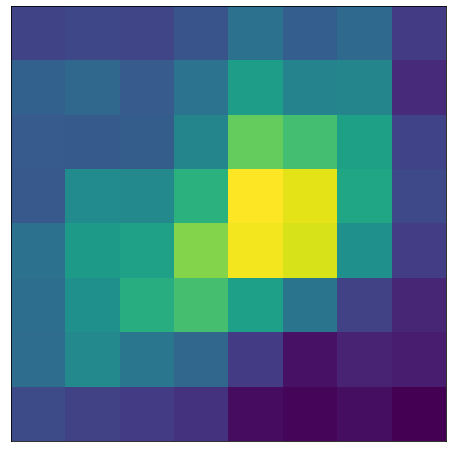

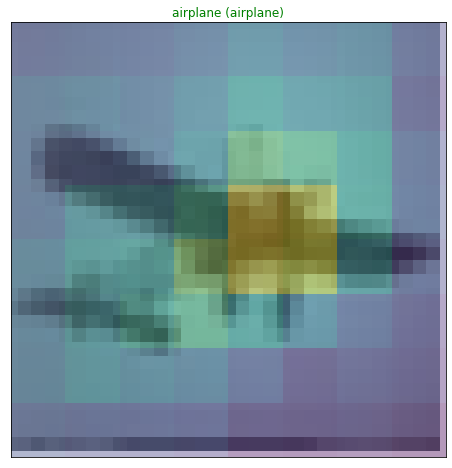

In [7]:
load_model.eval()
with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(DEVICE)
    y_batch = y_batch.to(DEVICE)
    y_hat = load_model(x_batch)
    pred = y_hat.argmax(dim=1)

    feature_map1 = load_model.conv_block1(x_batch)
    feature_map2 = load_model.conv_block2(load_model.Maxpool1(feature_map1))
    feature_map3 = load_model.conv_block3(load_model.Maxpool2(feature_map2))

x_batch = x_batch.cpu()
feature_map1 = feature_map1.cpu()
feature_map2 = feature_map2.cpu()
feature_map3 = feature_map3.cpu()

plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(x_batch[0,...].permute(1,2,0))

print(feature_map1.shape)
plt.figure(figsize=(32,16))
for idx in range(32):
    plt.subplot(4,8,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map1[0,idx,...], cmap="gray")

print(feature_map2.shape)
plt.figure(figsize=(16,16))
for idx in range(64):
    plt.subplot(8,8,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map2[0,idx,...], cmap="gray")

print(feature_map3.shape)
plt.figure(figsize=(16,8))
for idx in range(128):
    plt.subplot(8,16,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map3[0,idx,...], cmap="gray")

summed_map = feature_map3.sum(dim=1)
plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(summed_map[0,...])

plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(x_batch[0,...].permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,32,32,0], alpha=0.4)
pred_class = test_DS.classes[pred]
true_class = test_DS.classes[y_batch]
plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==true_class else "r")

In [8]:
# 얕은 CNN -> 성능이 안좋아서 특징이 잘 안보임
# load_model.eval()
# with torch.no_grad():
#     x_batch, y_batch = next(iter(test_DL))
#     x_batch = x_batch.to(DEVICE)
#     y_batch = y_batch.to(DEVICE)
#     y_hat = load_model(x_batch)
#     pred = y_hat.argmax(dim=1)

#     feature_map1 = load_model.conv1(x_batch)
#     feature_map2 = load_model.conv2(load_model.Maxpool1(feature_map1))
#     feature_map3 = load_model.conv3(load_model.Maxpool2(feature_map2))


# plt.figure(figsize=(8,8))
# plt.xticks([]); plt.yticks([])
# plt.imshow(x_batch[0,...].permute(1,2,0))

# print(feature_map1.shape)
# plt.figure(figsize=(32,16))
# for idx in range(8):
#     plt.subplot(2,4,idx+1, xticks=[], yticks=[])
#     plt.imshow(feature_map1[0,idx,...], cmap="gray")

# print(feature_map2.shape)
# plt.figure(figsize=(16,16))
# for idx in range(16):
#     plt.subplot(4,4,idx+1, xticks=[], yticks=[])
#     plt.imshow(feature_map2[0,idx,...], cmap="gray")

# print(feature_map3.shape)
# plt.figure(figsize=(16,8))
# for idx in range(32):
#     plt.subplot(4,8,idx+1, xticks=[], yticks=[])
#     plt.imshow(feature_map3[0,idx,...], cmap="gray")

# summed_map=torch.sum(feature_map3, dim=1)
# plt.figure(figsize=(8,8))
# plt.xticks([]); plt.yticks([])
# plt.imshow(summed_map[0,...])

# plt.figure(figsize=(8,8))
# plt.xticks([]); plt.yticks([])
# plt.imshow(x_batch[0,...].permute(1,2,0))
# plt.imshow(summed_map[0,...], extent=[0,32,32,0], alpha=0.4)
# pred_class = test_DS.classes[pred]
# true_class = test_DS.classes[y_batch]
# plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==true_class else "r")